<a href="https://colab.research.google.com/github/Kundan71/EDA-on-Telecom-Churn-data/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Capstone Project/Telecom Churn Analysis/Telecom Churn.csv'
telecom_churn_df = pd.read_csv(path)

In [5]:
telecom_churn_df.shape

(3333, 20)

In [6]:
telecom_churn_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
telecom_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [8]:
churn_copy_df = telecom_churn_df.copy()

In [9]:
churn_copy_df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [10]:
churn_copy_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [11]:
churn_copy_df['State'].nunique()

51

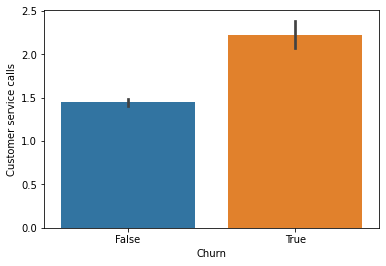

In [12]:
sns.barplot(x='Churn', y='Customer service calls',data=churn_copy_df)

In [13]:
print('Total percentage of churn = ',100*churn_copy_df[churn_copy_df['Churn']==True].shape[0]/churn_copy_df.shape[0])

Total percentage of churn =  14.491449144914492


In [14]:
areawise_df = churn_copy_df.groupby('Area code')['Customer service calls'].sum().reset_index()

In [15]:
areawise_df

,Area code,Customer service calls
0,408,1273
1,415,2572
2,510,1364


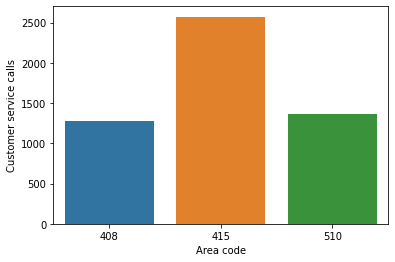

In [16]:
sns.barplot(x='Area code', y='Customer service calls',data=areawise_df)

In [17]:
churn_copy_df[churn_copy_df['Churn'] == True].shape

(483, 20)

In [18]:
count = 0
for row, cols in churn_copy_df.iterrows():
  if cols['Area code'] == 408 and cols['Churn']==True:
    count+=1
count

122

In [19]:
def churn_percent_by_areacode(code):
  count = 0
  for row, cols in churn_copy_df.iterrows():
    if cols['Area code'] == code and cols['Churn']==True:
      count+=1
  percent_count = 100*count/churn_copy_df[churn_copy_df['Churn'] == True].shape[0]
  return print(f'For area code {code} the unsubscribed customer is {percent_count}%')

In [20]:
churn_copy_df[churn_copy_df['Churn'] == True].shape[0]

483

In [21]:
area_code = [408,415,510]
for code in area_code:
  churn_percent_by_areacode(code)

For area code 408 the unsubscribed customer is 25.25879917184265%
For area code 415 the unsubscribed customer is 48.86128364389234%
For area code 510 the unsubscribed customer is 25.87991718426501%


In [22]:
def unsubscribed_count(code):
  count = 0
  for row, cols in churn_copy_df.iterrows():
    if cols['Area code'] == code and cols['Churn']==True:
      count+=1
  return 100*count/churn_copy_df[churn_copy_df['Churn'] == True].shape[0]
    

area_code_count = []
for num in area_code:
  area_code_count.append(unsubscribed_count(num))

area_code_count_df = pd.DataFrame({'Area_code' : area_code, 'Unsubscribed_percent': area_code_count})


In [23]:
area_code_count_df

,Area_code,Unsubscribed_percent
0,408,25.258799
1,415,48.861284
2,510,25.879917


Text(0.5, 1.0, 'Percentage of unsubscribtion by area code')

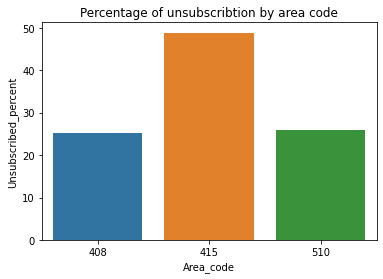

In [24]:
ax = sns.barplot(x='Area_code', y='Unsubscribed_percent',data=area_code_count_df)
ax.set_title('Percentage of unsubscribtion by area code')

In [25]:
churn_copy_df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [26]:
churn_copy_df['Area code'].nunique()

3

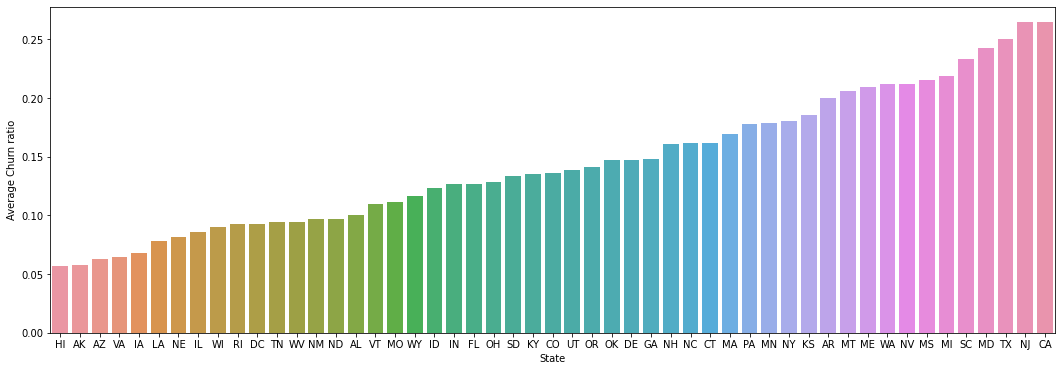

In [27]:
unsubscribed_df = churn_copy_df[churn_copy_df['Churn'] == True]
statewise_churn_count =unsubscribed_df.groupby(['State'])['Churn'].sum()
state_count = churn_copy_df['State'].value_counts()
average_statewise_churn_ratio =statewise_churn_count/state_count


ss =pd.DataFrame(average_statewise_churn_ratio)
ss.reset_index(inplace=True)
ss.columns=['State','Average Churn ratio']
ss['Average Subscription rate']=1-ss['Average Churn ratio']
ss.sort_values('Average Churn ratio',inplace=True)
fig1 = plt.figure(figsize=(18, 6))
sns.barplot(x='State',y='Average Churn ratio',data=ss)

In [28]:
lst=[]
for name,group in unsubscribed_df.groupby(['State','Churn']):
    lst.append([name[1],name[0],group.shape[0]])

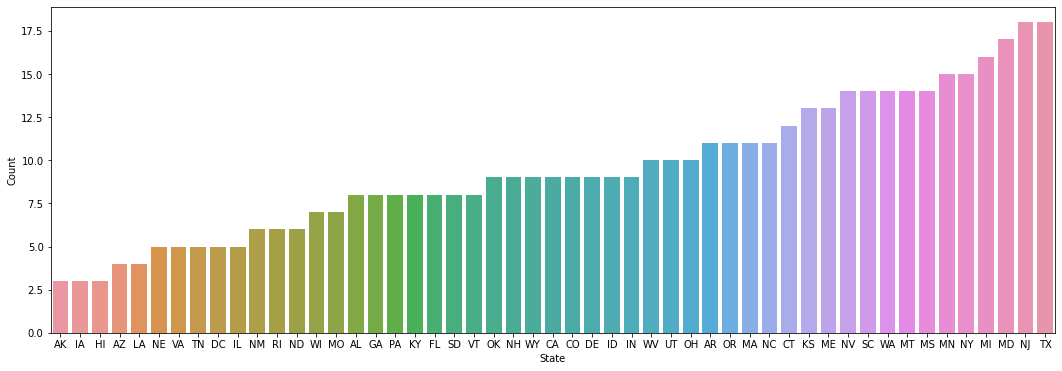

In [30]:
df_state_count=pd.DataFrame(lst)
df_state_count.columns=['Churn','State','Count']
df_state_count.sort_values('Count',inplace=True)
fig = plt.figure(figsize=(18, 6))
ax = sns.barplot(x="State", y = 'Count', data=df_state_count)


In [31]:
state_with_high_unsubs_df = df_state_count[df_state_count['Count'] > 10]

In [32]:
state_with_high_unsubs_df['State'].nunique()

18

In [34]:
lst=[]
for name,group in churn_copy_df.groupby(['State','Churn']):
    lst.append([name[1],name[0],group.shape[0]])
df_state_count=pd.DataFrame(lst)
df_state_count.columns=['Churn','State','Count']


In [35]:
df_state_count.head(5)


,Churn,State,Count
0,False,AK,49
1,True,AK,3
2,False,AL,72
3,True,AL,8
4,False,AR,44


In [36]:
import plotly.express as px

#long_df = px.data.df_state_count()

fig2 = px.bar(ss, x="State", y="Average Churn ratio", title="Average Unsubscription rate by State").update_xaxes(categoryorder ='total ascending')
fig2.show()

In [37]:
import plotly.express as px

#long_df = px.data.df_state_count()

fig = px.bar(df_state_count, x="State", y="Count", color="Count", title="No of Unsubscription by State").update_xaxes(categoryorder ='total ascending')
fig.show()

In [38]:
churn_copy_df['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [39]:
churn_intel_plan_df = unsubscribed_df.groupby('International plan')['Churn'].count().reset_index()

In [40]:
churn_intel_plan_df

,International plan,Churn
0,No,346
1,Yes,137


In [41]:
churn_copy_df.groupby('Churn')['International plan'].value_counts()

Churn  International plan
False  No                    2664
       Yes                    186
True   No                     346
       Yes                    137
Name: International plan, dtype: int64

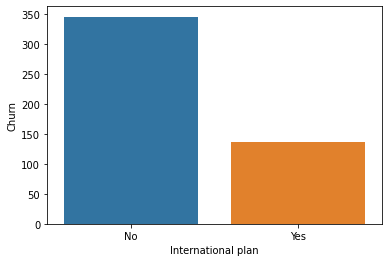

In [42]:
ax = sns.barplot(x='International plan', y='Churn', data=churn_intel_plan_df)

In [43]:
fig = px.box(churn_copy_df,x="International plan",color ='Churn',points="all")
fig.show()

In [44]:
churn_copy_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [45]:
churn_copy_df['Voice mail plan'].unique()

array(['Yes', 'No'], dtype=object)

In [46]:
churn_voice_mail_plan_df = unsubscribed_df.groupby('Voice mail plan')['Churn'].count().reset_index()
churn_voice_mail_plan_df

,Voice mail plan,Churn
0,No,403
1,Yes,80


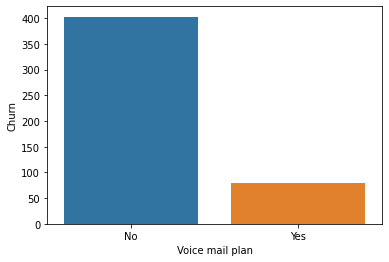

In [47]:
ax = sns.barplot(x='Voice mail plan', y='Churn', data=churn_voice_mail_plan_df)

In [48]:
fig = px.box(churn_copy_df, x="Churn", points="all",color='Voice mail plan')
fig.show()

In [49]:
churn_voice_mail_plan_df = unsubscribed_df.groupby(['Voice mail plan','International plan'])['Churn'].count().reset_index()
churn_voice_mail_plan_df

,Voice mail plan,International plan,Churn
0,No,No,302
1,No,Yes,101
2,Yes,No,44
3,Yes,Yes,36


In [50]:
fig = px.box(churn_copy_df, x="Churn", y= 'Account length', points="all")
fig.show()

In [52]:
# mean account length of people who churn out
aa =churn_copy_df[(churn_copy_df['Churn']==True)].agg({'Account length':'mean'})
aa

Account length    102.664596
dtype: float64

In [53]:
# people who did not churn out and have account length higher than those who unsubscribed.
bb = churn_copy_df[(churn_copy_df['Churn']==False) & (churn_copy_df['Account length']>= int(aa))]
bb

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,MS,103,510,No,Yes,29,164.1,111,27.90,219.1,96,18.62,220.3,108,9.91,12.3,9,3.32,0,False
3317,SD,163,415,Yes,No,0,197.2,90,33.52,188.5,113,16.02,211.1,94,9.50,7.8,8,2.11,1,False
3324,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False


In [54]:
# analysizing the International plan
cc= bb.groupby(['Area code'])['International plan'].value_counts()
cc

Area code  International plan
408        No                    331
           Yes                    21
415        No                    635
           Yes                    46
510        No                    325
           Yes                    27
Name: International plan, dtype: int64

In [56]:
dd =(bb['International plan']=='Yes').mean()
dd
qq= (churn_copy_df['International plan']=='Yes').mean()
qq
print(f'the average availers of international plan who did not churn out is  {round(dd,3)*100} which is less than overall mean of international plan availers{round(qq,3)*100}')
print('so we can conclude that non-international plan users are less prone to churn out')

the average availers of international plan who did not churn out is  6.800000000000001 which is less than overall mean of international plan availers9.700000000000001
so we can conclude that non-international plan users are less prone to churn out


In [57]:
#analysing voice mail plan service
ee = bb.groupby(['Area code'])['Voice mail plan'].value_counts()
ee

Area code  Voice mail plan
408        No                 263
           Yes                 89
415        No                 459
           Yes                222
510        No                 252
           Yes                100
Name: Voice mail plan, dtype: int64

In [59]:
ff =(bb['Voice mail plan']=='Yes').mean()
ff
ww= (churn_copy_df['Voice mail plan']=='Yes').mean()
ww
print(f'the average availers of voice mail plan who did not churn out is  {round(ff,3)*100}% which is more than overall mean of voice mail plan availers {round(ww,3)*100} %')
print('so we can conclude that voice mail plan subscribers  are less prone to churn out.')

the average availers of voice mail plan who did not churn out is  29.7% which is more than overall mean of voice mail plan availers 27.700000000000003 %
so we can conclude that voice mail plan subscribers  are less prone to churn out.


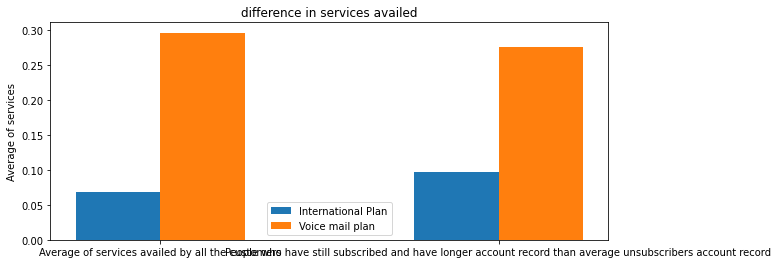

In [60]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Average of services availed by all the customers', 'People who have still subscribed and have longer account record than average unsubscribers account record']
data = [dd,qq]
data1 = [ff,ww]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize =(10, 4))
rects1 = ax.bar(x - width/2, data, width, label='International Plan')
rects2 = ax.bar(x + width/2, data1, width, label='Voice mail plan')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average of services')
ax.set_title('difference in services availed')
ax.set_xticks(x)

ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [51]:
churn_copy2_df = churn_copy_df.copy()

In [ ]:
churn_copy2_df['Total charge'] = churn_copy2_df['Total day charge'] + churn_copy2_df['Total eve charge'] + churn_copy2_df['Total night charge'] + churn_copy2_df['Total intl charge']

In [ ]:
churn_copy2_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09


In [ ]:
fig = px.pie(churn_copy2_df, values='Total charge', names='Area code')
fig.show()

In [ ]:
unsubscribed2_df = churn_copy2_df[churn_copy2_df['Churn'] == True]

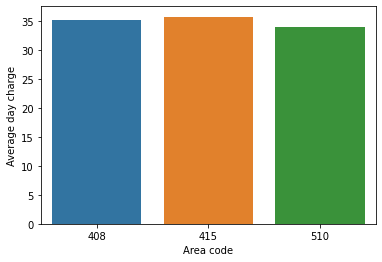

In [ ]:
total_charge_churn_df = unsubscribed2_df.groupby('Area code')['Total day charge'].mean().reset_index()
total_charge_churn_df = total_charge_churn_df.rename(columns={'Total day charge':'Average day charge',})
ax = sns.barplot(y='Average day charge', x='Area code', data=total_charge_churn_df)

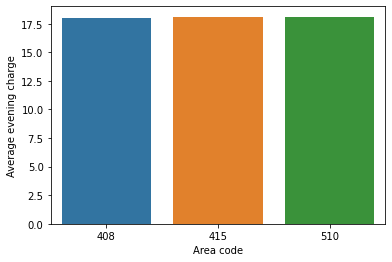

In [ ]:
total_charge_churn_df = unsubscribed2_df.groupby('Area code')['Total eve charge'].mean().reset_index()
total_charge_churn_df = total_charge_churn_df.rename(columns={'Total eve charge':'Average evening charge',})
ax = sns.barplot(y='Average evening charge', x='Area code', data=total_charge_churn_df)

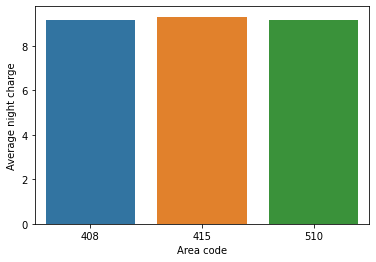

In [ ]:

total_charge_churn_df = unsubscribed2_df.groupby('Area code')['Total night charge'].mean().reset_index()
total_charge_churn_df = total_charge_churn_df.rename(columns={'Total night charge':'Average night charge',})
ax = sns.barplot(y='Average night charge', x='Area code', data=total_charge_churn_df)

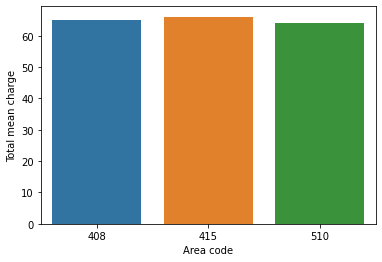

In [ ]:
total_charge_churn_df = unsubscribed2_df.groupby('Area code')['Total charge'].mean().reset_index()
total_charge_churn_df = total_charge_churn_df.rename(columns={'Total charge':'Total mean charge',})
ax = sns.barplot(y='Total mean charge', x='Area code', data=total_charge_churn_df)

In [ ]:
corr_df = churn_copy2_df.corr()

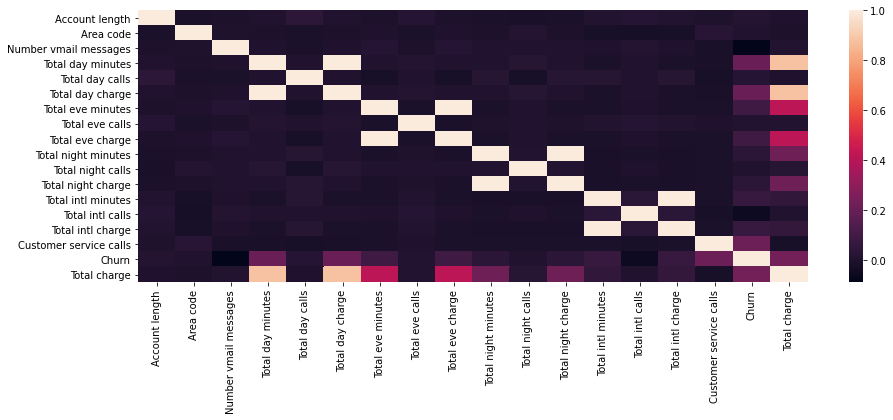

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(corr_df)

In [ ]:
churn_copy2_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Total charge'],
      dtype='object')

In [ ]:
churn_copy2_final1_df = churn_copy2_df.drop(['Total day minutes', 'Total eve minutes','Total night minutes','Total intl minutes'], axis = 1)

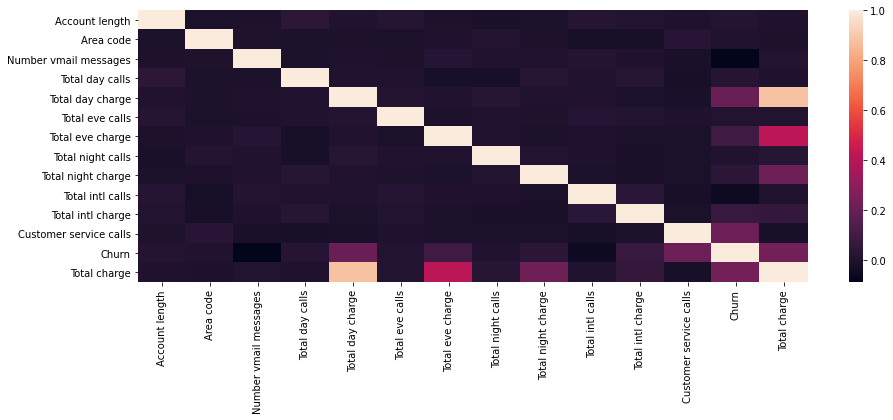

In [ ]:
corr_final1_df = churn_copy2_final1_df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr_final1_df)

In [ ]:
churn_copy2_final2_df = churn_copy2_final1_df.drop(['Total day charge', 'Total eve charge','Total night charge','Total intl charge'], axis = 1)

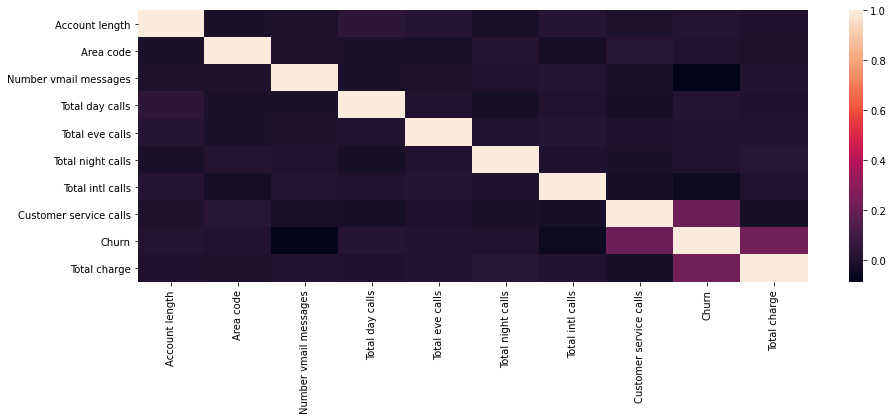

In [ ]:
corr_final2_df = churn_copy2_final2_df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr_final2_df)

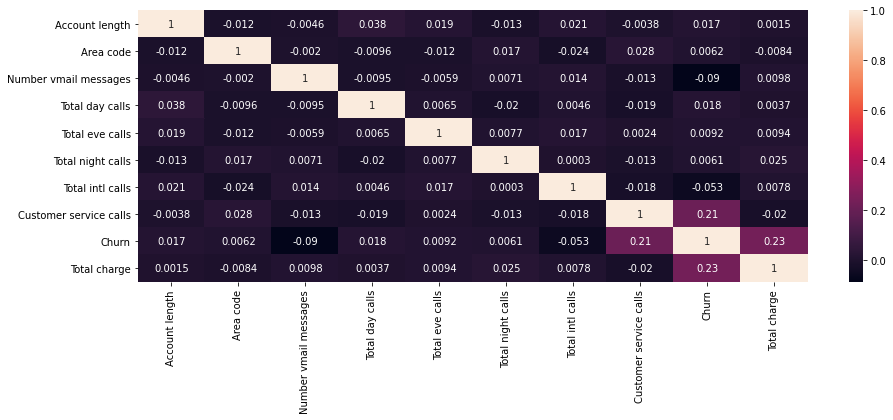

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.heatmap(corr_final2_df, annot=True)

In [ ]:
telecom_churn_df_copy.columns

NameError: ignored

In [ ]:
needed_columns = ['Total day minutes','Total day calls', 'Total day charge', 'Total eve minutes','Total eve calls', 'Total eve charge', 
                  'Total night minutes','Total night calls', 'Total night charge','Churn']

In [ ]:
telecom_churn_df_copy = telecom_churn_df_copy[needed_columns]

In [ ]:
telecom_churn_df_copy.describe()

,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325
std,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000
25%,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000
50%,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000
75%,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000
max,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000


In [ ]:
telecom_churn_df_copy.head()

NameError: ignored

In [ ]:
def total_sum(cols):
  return telecom_churn_df_copy[cols].sum()

In [ ]:
cols_list = ['Total day minutes','Total day calls', 'Total day charge', 'Total eve minutes','Total eve calls', 'Total eve charge', 'Total night minutes',
                   'Total night calls', 'Total night charge']
cols_list_value = []
for cols in cols_list:
  cols_list_value.append(total_sum(cols))
  print(f'The {cols}: {total_sum(cols)}')
  


NameError: ignored

ValueError: ignored

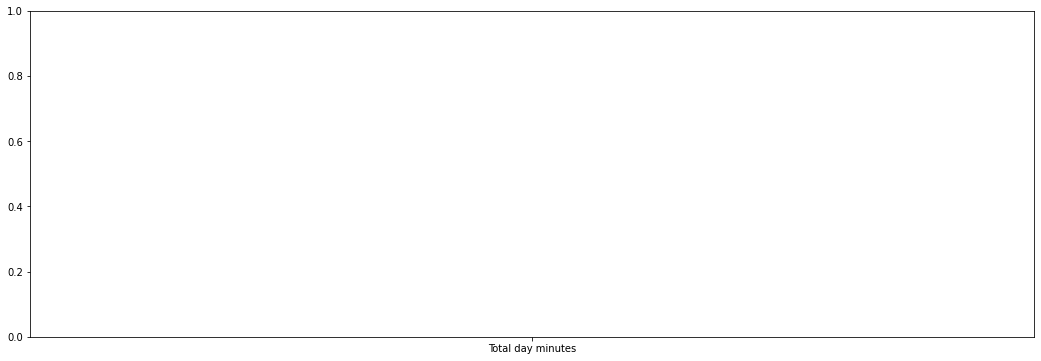

In [ ]:
fig = plt.figure(figsize=(18, 6))
plt.bar(cols_list, cols_list_value)

In [ ]:
subscribed_df = telecom_churn_df_copy[telecom_churn_df_copy['Churn'] == False]

In [ ]:
unsubscribed_df = telecom_churn_df_copy[telecom_churn_df_copy['Churn'] == True]

In [ ]:
unsubscribed_df.head()

,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Churn
10,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,True
15,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,True
21,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,True
33,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,True
41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,True


In [ ]:
minu = unsubscribed_df['Total day minutes'].mean()
minu

206.91407867494814

In [ ]:
charge = unsubscribed_df['Total day charge'].mean()
charge

35.17592132505176

In [ ]:
unsubscribed_min_to_charge_ratio = minu/charge
unsubscribed_min_to_charge_ratio

5.882264653792793

In [ ]:
unsubscribed_df['Total day calls'].mean()

101.33540372670808

In [ ]:
minu = subscribed_df['Total day minutes'].mean()
minu

175.17575438596492

In [ ]:
charge = subscribed_df['Total day charge'].mean()
charge

29.780421052631663

In [ ]:
subscribed_min_to_charge_ratio = minu/charge
subscribed_min_to_charge_ratio

5.882245723671017

In [ ]:
subscribed_df['Total day calls'].mean()

100.28315789473685

In [ ]:
unsubscribed_df.describe()

,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528
std,68.997792,21.582307,11.729710,51.728910,19.724711,4.396762,47.132825,19.950659,2.121081
min,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,47.400000,49.000000,2.130000
25%,153.250000,87.500000,26.055000,177.100000,87.000000,15.055000,171.250000,85.000000,7.705000
50%,217.600000,103.000000,36.990000,211.300000,101.000000,17.960000,204.800000,100.000000,9.220000
75%,265.950000,116.500000,45.210000,249.450000,114.000000,21.205000,239.850000,115.000000,10.795000
max,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,354.900000,158.000000,15.970000


In [ ]:
unsubscribed_df.shape

(483, 10)

In [ ]:
subscribed_df.shape

(2850, 10)

In [ ]:
subscribed_df.describe()

,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074
std,50.181655,19.801157,8.530835,50.292175,19.958414,4.274863,51.105032,19.506246,2.299768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000
25%,142.825000,87.000000,24.282500,164.500000,87.000000,13.980000,165.900000,87.000000,7.470000
50%,177.200000,100.000000,30.120000,199.600000,100.000000,16.970000,200.250000,100.000000,9.010000
75%,210.300000,114.000000,35.750000,233.200000,114.000000,19.820000,234.900000,113.000000,10.570000
max,315.600000,163.000000,53.650000,361.800000,170.000000,30.750000,395.000000,175.000000,17.770000


In [ ]:
corr_df = telecom_churn_df.corr()

In [ ]:
corr_df

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493
